In [1]:
df <- read.csv('CardiacPrediction.csv')

df$CoronaryHeartDisease = factor(df$CoronaryHeartDisease)
df

SEQN,Gender,Age,Annual.Family.Income,Ratio.Family.Income.Poverty,X60.sec.pulse,Systolic,Diastolic,Weight,Height,⋯,Total.Cholesterol,HDL,Glycohemoglobin,Vigorous.work,Moderate.work,Health.Insurance,Diabetes,Blood.Rel.Diabetes,Blood.Rel.Stroke,CoronaryHeartDisease
<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
2,1,77,8,5.00,68,98,56,75.40,174.0,⋯,5.56,1.39,4.7,3,3,1,2,2,2,0
5,1,49,11,5.00,66,122,83,92.50,178.3,⋯,7.21,1.08,5.5,1,1,1,2,2,2,0
12,1,37,11,4.93,64,174,99,99.20,180.0,⋯,4.03,0.98,5.2,2,1,1,2,1,1,0
13,1,70,3,1.07,102,130,66,63.60,157.7,⋯,8.12,1.28,7.6,3,3,1,1,1,2,0
14,1,81,5,2.67,72,136,61,75.50,166.2,⋯,4.50,1.04,5.8,1,1,1,2,2,2,0
15,2,38,8,4.52,68,109,69,81.60,174.9,⋯,5.15,1.49,4.6,1,1,1,2,2,2,0
16,2,85,1,0.38,66,139,60,41.50,144.2,⋯,4.24,1.41,4.6,1,2,1,2,2,2,0
20,2,23,6,3.03,72,103,60,59.80,158.9,⋯,3.75,1.10,4.7,2,1,2,2,1,2,0
24,2,53,6,2.67,82,114,71,69.90,164.2,⋯,5.66,2.72,5.3,2,2,2,2,1,2,0


In [2]:
library('dplyr')
glimpse(df)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Rows: 37,079
Columns: 51
$ SEQN                        <int> 2, 5, 12, 13, 14, 15, 16, 20, 24, 25, 29, …
$ Gender                      <int> 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, …
$ Age                         <int> 77, 49, 37, 70, 81, 38, 85, 23, 53, 42, 62…
$ Annual.Family.Income        <int> 8, 11, 11, 3, 5, 8, 1, 6, 6, 5, 3, 5, 5, 4…
$ Ratio.Family.Income.Poverty <dbl> 5.00, 5.00, 4.93, 1.07, 2.67, 4.52, 0.38, …
$ X60.sec.pulse               <int> 68, 66, 64, 102, 72, 68, 66, 72, 82, 74, 1…
$ Systolic                    <int> 98, 122, 174, 130, 136, 109, 139, 103, 114…
$ Diastolic                   <int> 56, 83, 99, 66, 61, 69, 60, 60, 71, 85, 71…
$ Weight                      <dbl> 75.4, 92.5, 99.2, 63.6, 75.5, 81.6, 41.5, …
$ Height                      <dbl> 174.0, 178.3, 180.0, 157.7, 166.2, 174.9, …
$ Body.Mass.Index             <dbl> 24.90, 29.10, 30.62, 25.57, 27.33, 26.68, …
$ White.Blood.Cells           <dbl> 7.6, 5.9, 10.2, 11.6, 9.1, 7.6, 7.4, 5.6, …
$ Lymphocyte   

### Installing libraries

In [9]:
library(tidyverse)
library(caret)
library(rpart.plot)
library(corrplot)
library(ggcorrplot)

### Splitting the data

In [10]:
set.seed(123)

train_index <- createDataPartition(df$CoronaryHeartDisease, times = 1, p = 0.75, list = FALSE)

train_data <- df[train_index, ] %>% glimpse

Rows: 27,810
Columns: 51
$ SEQN                        <int> 2, 5, 12, 13, 14, 16, 20, 24, 25, 29, 57, …
$ Gender                      <int> 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, …
$ Age                         <int> 77, 49, 37, 70, 81, 85, 23, 53, 42, 62, 39…
$ Annual.Family.Income        <int> 8, 11, 11, 3, 5, 1, 6, 6, 5, 3, 11, 3, 10,…
$ Ratio.Family.Income.Poverty <dbl> 5.00, 5.00, 4.93, 1.07, 2.67, 0.38, 3.03, …
$ X60.sec.pulse               <int> 68, 66, 64, 102, 72, 66, 72, 82, 74, 118, …
$ Systolic                    <int> 98, 122, 174, 130, 136, 139, 103, 114, 119…
$ Diastolic                   <int> 56, 83, 99, 66, 61, 60, 60, 71, 85, 71, 83…
$ Weight                      <dbl> 75.40, 92.50, 99.20, 63.60, 75.50, 41.50, …
$ Height                      <dbl> 174.0, 178.3, 180.0, 157.7, 166.2, 144.2, …
$ Body.Mass.Index             <dbl> 24.90, 29.10, 30.62, 25.57, 27.33, 19.96, …
$ White.Blood.Cells           <dbl> 7.6, 5.9, 10.2, 11.6, 9.1, 7.4, 5.6, 9.4, …
$ Lymphocyte   

In [11]:
test_data <- df[-train_index, ] %>% glimpse()

Rows: 9,269
Columns: 51
$ SEQN                        <int> 15, 33, 34, 45, 46, 55, 83, 86, 93, 108, 1…
$ Gender                      <int> 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, …
$ Age                         <int> 38, 46, 38, 33, 85, 61, 60, 63, 63, 22, 64…
$ Annual.Family.Income        <int> 8, 5, 5, 4, 3, 7, 5, 4, 9, 11, 7, 7, 11, 3…
$ Ratio.Family.Income.Poverty <dbl> 4.52, 1.78, 0.92, 0.75, 1.20, 3.33, 2.40, …
$ X60.sec.pulse               <int> 68, 78, 60, 76, 54, 86, 86, 64, 82, 78, 56…
$ Systolic                    <int> 109, 107, 115, 120, 128, 113, 118, 121, 11…
$ Diastolic                   <int> 69, 71, 77, 76, 65, 67, 72, 68, 80, 73, 52…
$ Weight                      <dbl> 81.6, 110.5, 67.4, 75.8, 57.6, 72.1, 90.5,…
$ Height                      <dbl> 174.9, 174.8, 162.2, 166.1, 155.6, 176.3, …
$ Body.Mass.Index             <dbl> 26.68, 36.16, 25.62, 27.47, 23.79, 23.20, …
$ White.Blood.Cells           <dbl> 7.6, 8.6, 7.6, 6.8, 6.5, 4.7, 8.0, 9.4, 6.…
$ Lymphocyte    

### Visualization

In [19]:
df$CoronaryHeartDisease <- as.integer(df$CoronaryHeartDisease)

df

SEQN,Gender,Age,Annual.Family.Income,Ratio.Family.Income.Poverty,X60.sec.pulse,Systolic,Diastolic,Weight,Height,⋯,Total.Cholesterol,HDL,Glycohemoglobin,Vigorous.work,Moderate.work,Health.Insurance,Diabetes,Blood.Rel.Diabetes,Blood.Rel.Stroke,CoronaryHeartDisease
<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,1,77,8,5.00,68,98,56,75.40,174.0,⋯,5.56,1.39,4.7,3,3,1,2,2,2,1
5,1,49,11,5.00,66,122,83,92.50,178.3,⋯,7.21,1.08,5.5,1,1,1,2,2,2,1
12,1,37,11,4.93,64,174,99,99.20,180.0,⋯,4.03,0.98,5.2,2,1,1,2,1,1,1
13,1,70,3,1.07,102,130,66,63.60,157.7,⋯,8.12,1.28,7.6,3,3,1,1,1,2,1
14,1,81,5,2.67,72,136,61,75.50,166.2,⋯,4.50,1.04,5.8,1,1,1,2,2,2,1
15,2,38,8,4.52,68,109,69,81.60,174.9,⋯,5.15,1.49,4.6,1,1,1,2,2,2,1
16,2,85,1,0.38,66,139,60,41.50,144.2,⋯,4.24,1.41,4.6,1,2,1,2,2,2,1
20,2,23,6,3.03,72,103,60,59.80,158.9,⋯,3.75,1.10,4.7,2,1,2,2,1,2,1
24,2,53,6,2.67,82,114,71,69.90,164.2,⋯,5.66,2.72,5.3,2,2,2,2,1,2,1


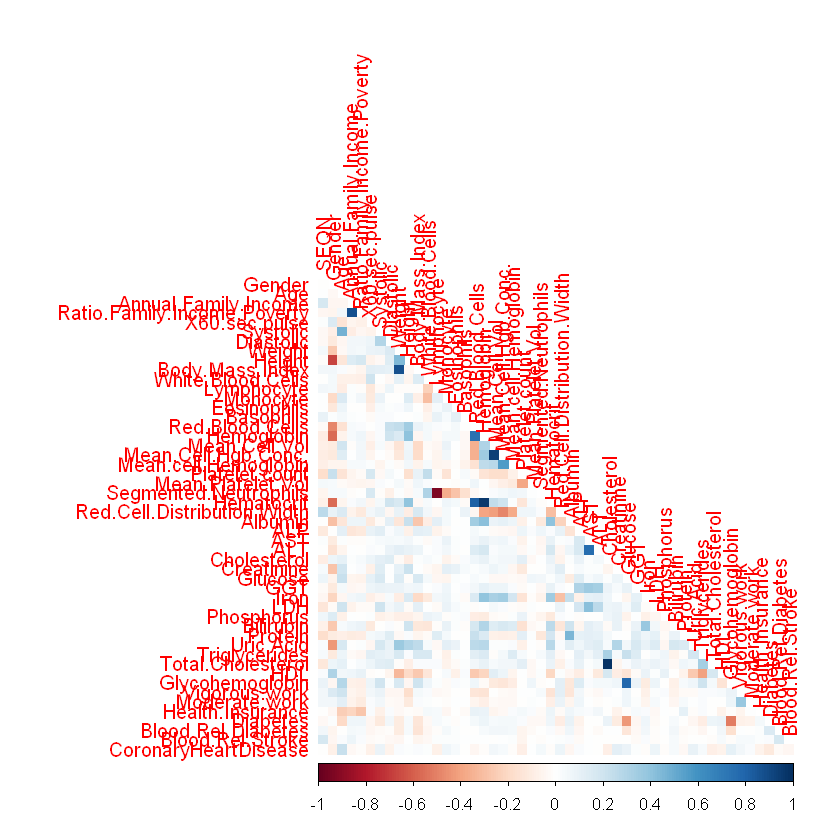

In [30]:
corrplot(cor(df), method = "color", diag = FALSE, type = "lower")

## Feature Selection

- identify highly correlated features

In [34]:
set.seed(7)
library(mlbench)
coma <- cor(df)
highlyCorr <- findCorrelation(coma, cutoff = 0.5)
print(highlyCorr)

 [1] 18 25  2 20  9 44 30 42  5 24


In [37]:
control <- trainControl(method="repeatedcv", number=10, repeats=3)
model <- train(df$CoronaryHeartDisease~., data=df, method="rf", preProcess="scale", trControl=control)
importance <- varImp(model, scale=FALSE)
print(importance)
plot(importance)

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


: 

10- fold cross validation

### Bagged CART

ERROR: Error: At least one of the class levels is not a valid R variable name; This will cause errors when class probabilities are generated because the variables names will be converted to  X0, X1 . Please use factor levels that can be used as valid R variable names  (see ?make.names for help).


### Random Forest

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."


ERROR: Error: Metric Accuracy not applicable for regression models
